In [11]:
import numpy as np
import pandas as pd
from scipy import io
import matplotlib.pyplot as plt
from network import network, sigmoid

In [12]:
# 吴恩达提供的梯度
weight = io.loadmat('/home/sjl/桌面/machine learning/mlclass-ex3-005/mlclass-ex3/ex3weights.mat')
weight1 = weight['Theta1']
weight2 = weight['Theta2']
weight = [weight1, weight2]

<function matplotlib.pyplot.show(*args, **kw)>

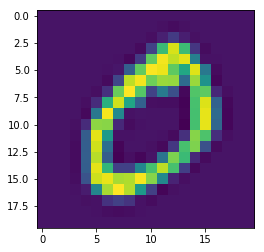

In [28]:
data = io.loadmat('/home/sjl/桌面/CoCo/data/ex3data1.mat')
x = data['X']
y = data['y']
y[y==10] = 0
# 构建分类标签
m = x.shape[0]
y1 = np.zeros((m, 10))
for i in range(10):
    y1[:, i] = np.int32(y==i).reshape(1, -1)
Y = y
y = y1
Y
plt.imshow(x[0].reshape(20, 20).T)
plt.show

In [27]:
# 计算预测成功率
def feedforward(x, weight):
        active = x
        for w in weight:
            m = active.shape[0]
            active0 = np.ones(m)
            active = np.insert(active, 0, values=active0, axis=1)
            z = np.dot(active, w.T)
            active = sigmoid(z)
        return active
actives = feedforward(x, weight)
max = np.max(actives, axis=1)
# m= x.shape[0]
# actives1 = np.zeros((m, 10))
# for i in range(m):
#     actives1[i, :] = np.int32(actives[i, :] == max[i])
# actives = actives1
actives1 = np.zeros((5000, 1))
num = 0
for i in range(5000):
    actives1[i][0] = np.where(actives[i, :]==max[i])[0]+1
    if actives1[i][0] == 10:
        actives1[i][0] = 0
    if actives1[i][0] == Y[i][0]:
        num += 1
actives1
num/5000

0.9752

array([[2.],
       [2.],
       [2.],
       ...,
       [2.],
       [2.],
       [2.]])